In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load the dataset
file_path = r'../../data/tidy/NTD_Annual_Data_Tidy_v01.csv'
df = pd.read_csv(file_path)

In [39]:
# Set 'Agency' as the index and drop the other info columns
df.set_index('Agency', inplace=True)
df_features = df.drop(columns=['NTD ID', 'City', 'State', 'UZA Name'])

In [40]:
df_features

,Total Operating Hours,Total Employees,Number of Operating Fleets,Ridership,Service Area Population,Service Area Sq Miles,Primary UZA Area Sq Miles,Diesel (gal),Gasoline (gal),Liquefied Petroleum Gas (gal),Compressed Natural Gas (gal),Bio Diesel (gal),Other Fuel (gal/gal equivalent),Electric Propulsion (kWh),Electric Battery (kWh),Total Diesel (gal),Total kWh
Agency,,,,,,,,,,,,,,,,,
MTA New York City Transit,NaN,NaN,50095.0,491106831.0,8804190.0,321.0,3248.12,27958302.0,3570980.0,0.0,4824913.0,0.0,0.0,1.552447e+09,618599.0,36354195.0,1.553066e+09
New Jersey Transit Corporation,NaN,NaN,26312.0,187806013.0,10594013.0,5325.0,3248.12,35585247.0,1805901.0,0.0,1257636.0,0.0,0.0,3.808166e+08,0.0,38648784.0,3.808166e+08
Washington Metropolitan Area Transit Authority,NaN,NaN,11228.0,122883834.0,5089918.0,1349.0,1294.51,7351971.0,1812002.0,0.0,3965272.0,0.0,0.0,4.381605e+08,17194.0,13129245.0,4.381777e+08
"Los Angeles County Metropolitan Transportation Authority , dba: Metro",NaN,NaN,17563.0,110932715.0,10394849.0,4099.0,1636.83,0.0,977648.0,0.0,26998561.0,0.0,0.0,1.877344e+08,3635843.0,27976209.0,1.913702e+08
Chicago Transit Authority,NaN,NaN,4360.0,115480485.0,3207635.0,310.0,2337.89,13403932.0,0.0,0.0,0.0,0.0,0.0,3.737274e+08,302556.0,13403932.0,3.740300e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chicago Water Taxi (Wendella),NaN,17.00,2.0,600.0,69764.0,89.0,2337.89,1174.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,1174.0,0.000000e+00
"North Front Range Transportation and Air Quality Planning Council, dba: North Front Range MPO / VanGo",NaN,4.00,32.0,368136.0,143986.0,56.0,117.98,0.0,17333.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,17333.0,0.000000e+00
"Charlotte County Government, dba: Charlotte County Transit Division",NaN,2.13,34.0,466622.0,186847.0,231.0,134.69,19241.0,25376.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,44617.0,0.000000e+00


In [41]:
# Remove commas from numeric columns and convert to numeric
numeric_columns = df_features.columns[df_features.dtypes == 'object']
df_features[numeric_columns] = df_features[numeric_columns].replace({',': ''}, regex=True)
df_features[numeric_columns] = df_features[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values with the median of the respective columns
#df_features = df_features.fillna(df_features.median())

# Drop rows with any NaN values in any column
#df_features = df_features.dropna(how='any')

df_features

,Total Operating Hours,Total Employees,Number of Operating Fleets,Ridership,Service Area Population,Service Area Sq Miles,Primary UZA Area Sq Miles,Diesel (gal),Gasoline (gal),Liquefied Petroleum Gas (gal),Compressed Natural Gas (gal),Bio Diesel (gal),Other Fuel (gal/gal equivalent),Electric Propulsion (kWh),Electric Battery (kWh),Total Diesel (gal),Total kWh
Agency,,,,,,,,,,,,,,,,,
MTA New York City Transit,NaN,NaN,50095.0,491106831.0,8804190.0,321.0,3248.12,27958302.0,3570980.0,0.0,4824913.0,0.0,0.0,1.552447e+09,618599.0,36354195.0,1.553066e+09
New Jersey Transit Corporation,NaN,NaN,26312.0,187806013.0,10594013.0,5325.0,3248.12,35585247.0,1805901.0,0.0,1257636.0,0.0,0.0,3.808166e+08,0.0,38648784.0,3.808166e+08
Washington Metropolitan Area Transit Authority,NaN,NaN,11228.0,122883834.0,5089918.0,1349.0,1294.51,7351971.0,1812002.0,0.0,3965272.0,0.0,0.0,4.381605e+08,17194.0,13129245.0,4.381777e+08
"Los Angeles County Metropolitan Transportation Authority , dba: Metro",NaN,NaN,17563.0,110932715.0,10394849.0,4099.0,1636.83,0.0,977648.0,0.0,26998561.0,0.0,0.0,1.877344e+08,3635843.0,27976209.0,1.913702e+08
Chicago Transit Authority,NaN,NaN,4360.0,115480485.0,3207635.0,310.0,2337.89,13403932.0,0.0,0.0,0.0,0.0,0.0,3.737274e+08,302556.0,13403932.0,3.740300e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chicago Water Taxi (Wendella),NaN,17.00,2.0,600.0,69764.0,89.0,2337.89,1174.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,1174.0,0.000000e+00
"North Front Range Transportation and Air Quality Planning Council, dba: North Front Range MPO / VanGo",NaN,4.00,32.0,368136.0,143986.0,56.0,117.98,0.0,17333.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,17333.0,0.000000e+00
"Charlotte County Government, dba: Charlotte County Transit Division",NaN,2.13,34.0,466622.0,186847.0,231.0,134.69,19241.0,25376.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,44617.0,0.000000e+00


In [42]:
### Drop two columns "Total Operating Hours", and "Total Employees" with NaN values and row "The Transportation Management Association Group" with NaN values

# Columns:
columns_to_drop = ['Total Operating Hours', 'Total Employees']
df_features = df_features.drop(columns=[col for col in columns_to_drop if df_features[col].isna().any()])

# Rows:
df_features = df_features.drop(index='The Transportation Management Association Group')
df_features

,Number of Operating Fleets,Ridership,Service Area Population,Service Area Sq Miles,Primary UZA Area Sq Miles,Diesel (gal),Gasoline (gal),Liquefied Petroleum Gas (gal),Compressed Natural Gas (gal),Bio Diesel (gal),Other Fuel (gal/gal equivalent),Electric Propulsion (kWh),Electric Battery (kWh),Total Diesel (gal),Total kWh
Agency,,,,,,,,,,,,,,,
MTA New York City Transit,50095.0,491106831.0,8804190.0,321.0,3248.12,27958302.0,3570980.0,0.0,4824913.0,0.0,0.0,1.552447e+09,618599.0,36354195.0,1.553066e+09
New Jersey Transit Corporation,26312.0,187806013.0,10594013.0,5325.0,3248.12,35585247.0,1805901.0,0.0,1257636.0,0.0,0.0,3.808166e+08,0.0,38648784.0,3.808166e+08
Washington Metropolitan Area Transit Authority,11228.0,122883834.0,5089918.0,1349.0,1294.51,7351971.0,1812002.0,0.0,3965272.0,0.0,0.0,4.381605e+08,17194.0,13129245.0,4.381777e+08
"Los Angeles County Metropolitan Transportation Authority , dba: Metro",17563.0,110932715.0,10394849.0,4099.0,1636.83,0.0,977648.0,0.0,26998561.0,0.0,0.0,1.877344e+08,3635843.0,27976209.0,1.913702e+08
Chicago Transit Authority,4360.0,115480485.0,3207635.0,310.0,2337.89,13403932.0,0.0,0.0,0.0,0.0,0.0,3.737274e+08,302556.0,13403932.0,3.740300e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Piedmont Authority for Regional Transportation,88.0,2140469.0,1705315.0,2500.0,169.31,183861.0,79146.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,263007.0,0.000000e+00
Chicago Water Taxi (Wendella),2.0,600.0,69764.0,89.0,2337.89,1174.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,1174.0,0.000000e+00
"North Front Range Transportation and Air Quality Planning Council, dba: North Front Range MPO / VanGo",32.0,368136.0,143986.0,56.0,117.98,0.0,17333.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,17333.0,0.000000e+00


In [43]:
if df_features.isna().any().any():
    print("There are NaN values in the DataFrame")
else:
    print("There are no NaN values in the DataFrame")


There are NaN values in the DataFrame


In [44]:
columns_with_nan = df_features.columns[df_features.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['Number of Operating Fleets', 'Ridership', 'Service Area Population', 'Service Area Sq Miles', 'Primary UZA Area Sq Miles', 'Diesel (gal)', 'Gasoline (gal)', 'Liquefied Petroleum Gas (gal)', 'Compressed Natural Gas (gal)', 'Bio Diesel (gal)', 'Other Fuel (gal/gal equivalent)', 'Electric Propulsion (kWh)', 'Electric Battery (kWh)', 'Total Diesel (gal)', 'Total kWh']


In [45]:
# Drop rows with any NaN values
df_features = df_features.dropna(how='any')
df_features

,Number of Operating Fleets,Ridership,Service Area Population,Service Area Sq Miles,Primary UZA Area Sq Miles,Diesel (gal),Gasoline (gal),Liquefied Petroleum Gas (gal),Compressed Natural Gas (gal),Bio Diesel (gal),Other Fuel (gal/gal equivalent),Electric Propulsion (kWh),Electric Battery (kWh),Total Diesel (gal),Total kWh
Agency,,,,,,,,,,,,,,,
MTA New York City Transit,50095.0,491106831.0,8804190.0,321.0,3248.12,27958302.0,3570980.0,0.0,4824913.0,0.0,0.0,1.552447e+09,618599.0,36354195.0,1.553066e+09
New Jersey Transit Corporation,26312.0,187806013.0,10594013.0,5325.0,3248.12,35585247.0,1805901.0,0.0,1257636.0,0.0,0.0,3.808166e+08,0.0,38648784.0,3.808166e+08
Washington Metropolitan Area Transit Authority,11228.0,122883834.0,5089918.0,1349.0,1294.51,7351971.0,1812002.0,0.0,3965272.0,0.0,0.0,4.381605e+08,17194.0,13129245.0,4.381777e+08
"Los Angeles County Metropolitan Transportation Authority , dba: Metro",17563.0,110932715.0,10394849.0,4099.0,1636.83,0.0,977648.0,0.0,26998561.0,0.0,0.0,1.877344e+08,3635843.0,27976209.0,1.913702e+08
Chicago Transit Authority,4360.0,115480485.0,3207635.0,310.0,2337.89,13403932.0,0.0,0.0,0.0,0.0,0.0,3.737274e+08,302556.0,13403932.0,3.740300e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Piedmont Authority for Regional Transportation,88.0,2140469.0,1705315.0,2500.0,169.31,183861.0,79146.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,263007.0,0.000000e+00
Chicago Water Taxi (Wendella),2.0,600.0,69764.0,89.0,2337.89,1174.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,1174.0,0.000000e+00
"North Front Range Transportation and Air Quality Planning Council, dba: North Front Range MPO / VanGo",32.0,368136.0,143986.0,56.0,117.98,0.0,17333.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,17333.0,0.000000e+00


In [46]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

In [47]:
# Reduce dimensionality with PCA
#pca = PCA(n_components=2)
#df_pca = pca.fit_transform(df_scaled)

In [48]:
# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 17):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on 

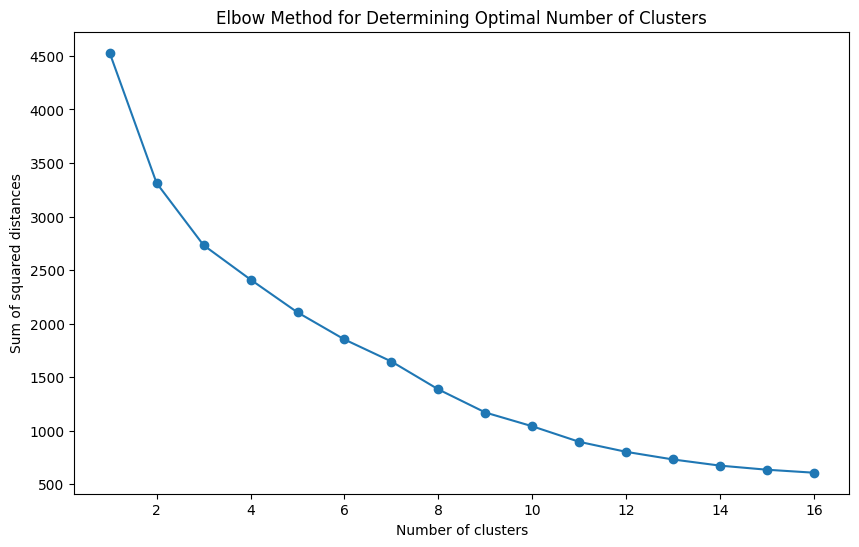

In [49]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 17), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()

In [50]:
### The optimal number of clusters appears to be 4. This is where the sum of squared distances (inertia) starts to level off, indicating that additional clusters do not significantly reduce the inertia. 

In [51]:
# Perform K-means clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_4'] = kmeans_4.fit_predict(df_scaled)

# Create a new DataFrame for plotting that excludes 'NTD ID'
df_plot = df.drop(columns=['NTD ID', 'City', 'State', 'UZA Name'])

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


ValueError: Length of values (302) does not match length of index (364)

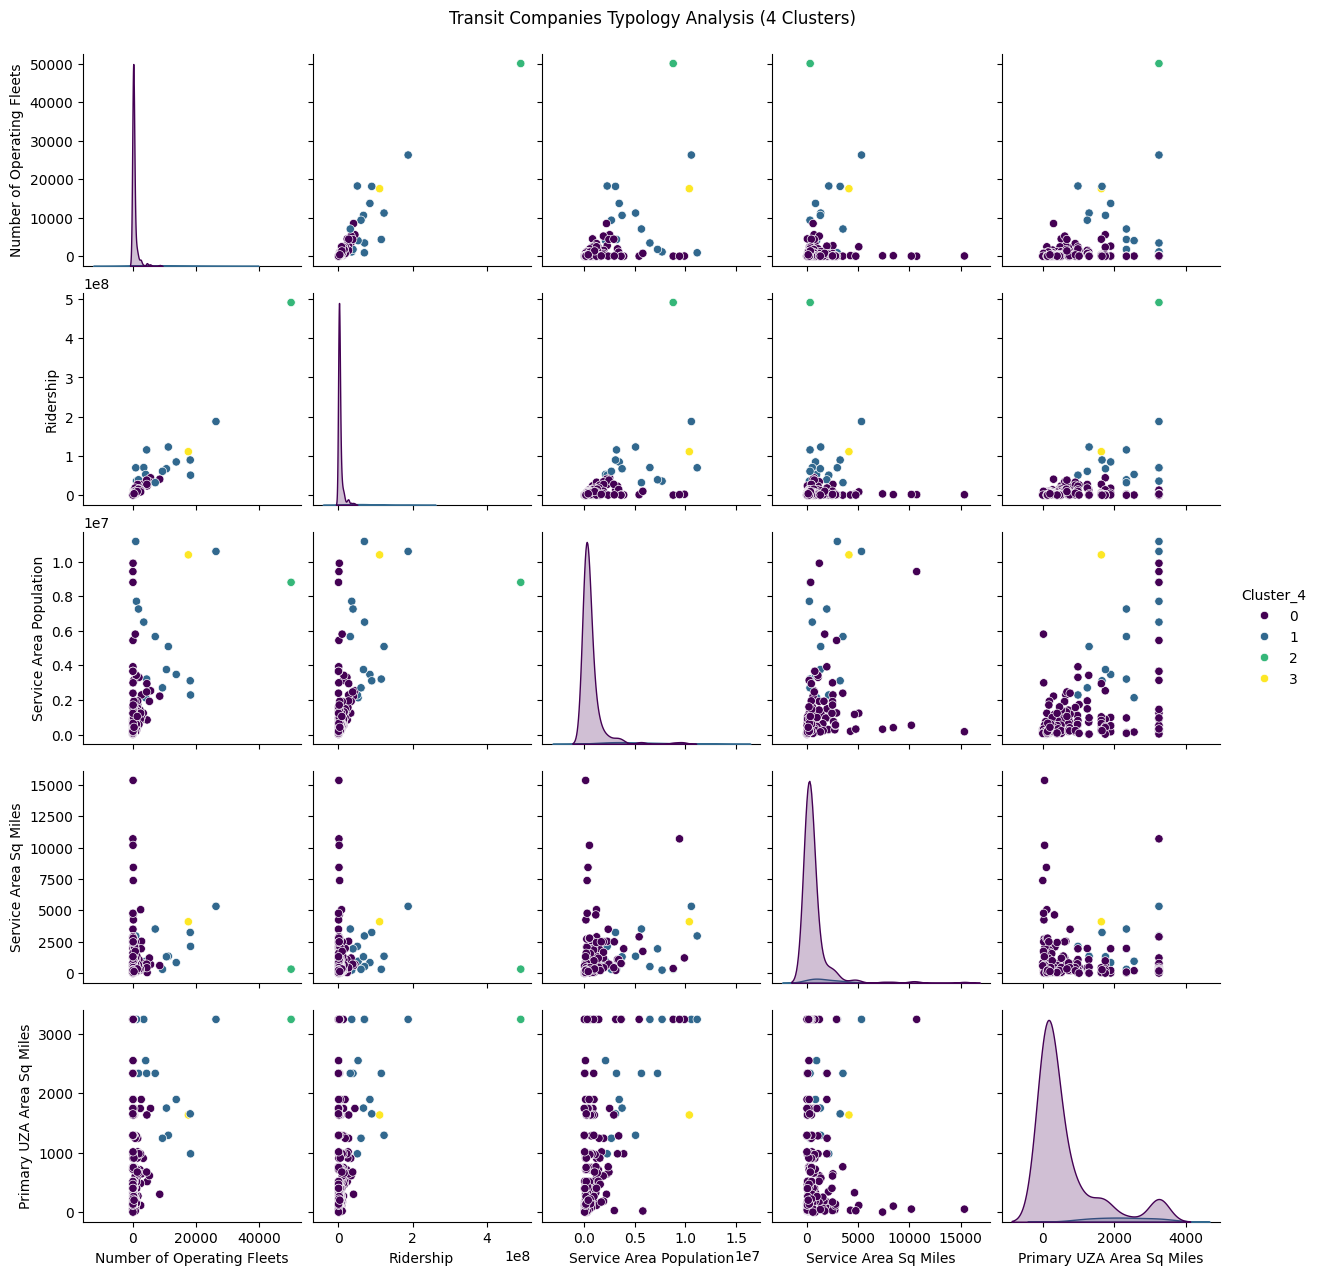

In [63]:
# Visualize the clusters with 4 clusters using pair plot
sns.pairplot(df_plot.reset_index(), hue='Cluster_4', palette='viridis', diag_kind='kde')
plt.suptitle('Transit Companies Typology Analysis (4 Clusters)', y=1.02)
plt.show()